In [6]:
import numpy as np
import pandas as pd
import gc

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, \
                            accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [8]:
plt.style.use(['default'])
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    'font.size': 12, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.facecolor':'white',
    'font.family': 'serif',
}
plt.rcParams.update(params)

### Read data

In [9]:
dftrain = pd.read_csv('../data/train.csv')
dftest = pd.read_csv('../data/test.csv')

## Exploratory Data Analysis

#### Get domain knowledge

In [10]:
print('Train:\n')
print('Number of rows: {}\nNumber of columns: {}\n'.format(dftrain.shape[0], dftrain.shape[1]))
print('Test:\n')
print('Number of rows: {}\nNumber of columns: {}'.format(dftest.shape[0], dftest.shape[1]))

Train:

Number of rows: 4459
Number of columns: 4993

Test:

Number of rows: 49342
Number of columns: 4992


In [11]:
pd.merge(dftrain.dtypes.sort_values().to_frame('feature_type').groupby('feature_type').size().to_frame('train_count').reset_index(),
         dftest.dtypes.sort_values().to_frame('feature_type').groupby('feature_type').size().to_frame('test_count').reset_index(),
         on='feature_type', how='outer')

,feature_type,train_count,test_count
0,int64,3147,NaN
1,float64,1845,4991.0
2,object,1,1.0


In [12]:
dftrain.head(5)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,...,69900c0d1,65b3354f4,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e3697

In [13]:
dftest.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,c38ca8ae3,...,69900c0d1,65b3354f4,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e3

#### Check if the columns are same:

In [16]:
train_cols = set(dftrain.columns)
test_cols = set(dftest.columns)
common_cols = train_cols.intersection(test_cols)

In [19]:
print(np.shape(list(common_cols)))

(4992,)


#### Target price statistics and distributions

In [46]:
dftrain.target.describe().to_frame().reset_index()

,index,target
0,count,4.459000e+03
1,mean,5.944923e+06
2,std,8.234312e+06
3,min,3.000000e+04
4,25%,6.000000e+05
5,50%,2.260000e+06
6,75%,8.000000e+06
7,max,4.000000e+07


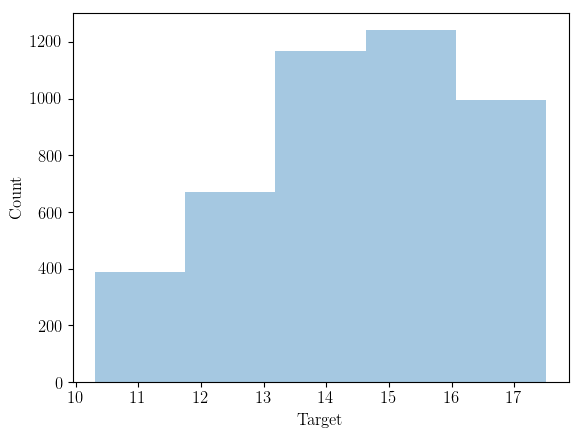

In [47]:
sns.distplot(np.log(dftrain.target), bins= 5, kde = False)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### 2. Feature selections and clean

#### Remove missing rows/features

In [8]:
print(dftrain.isnull().sum(axis = 0).to_frame('count').groupby('count').size())
print(dftest.isnull().sum(axis = 0).to_frame('count').groupby('count').size())

count
0    4993
dtype: int64
count
0    4992
dtype: int64


#### Remove constant features

In [5]:
def find_constant_features(dataFrame):
    features_to_remove = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            features_to_remove.append(column)
    return features_to_remove

In [6]:
features_to_remove = find_constant_features(dftrain)

In [7]:
features_to_remove.append('ID')
dftrain.drop(features_to_remove, axis = 1, inplace = True)
dftest.drop(features_to_remove, axis = 1, inplace = True)

In [25]:
print(dftrain.shape)
print(dftest.shape)

(4459, 4735)
(49342, 4735)


#### Remove Duplicate rows

In [26]:
groups = dftrain.columns.to_series().groupby(dftrain.dtypes).groups

In [27]:
aa = dftrain.columns.to_series().groupby(dftrain.dtypes).groups

#### Remove Duplicate columns

In [15]:
## With the help from :
## https://www.kaggle.com/samratp/lightgbm-xgboost-catboost

# def duplicate_columns(frame):
#     groups = frame.columns.to_series().groupby(frame.dtypes).groups
#     dups = []

#     for t, v in groups.items():

#         cs = frame[v].columns
#         vs = frame[v]
#         lcs = len(cs)

#         for i in range(lcs):
#             ia = vs.iloc[:,i].values
#             for j in range(i+1, lcs):
#                 ja = vs.iloc[:,j].values
#                 if np.array_equal(ia, ja):
#                     dups.append(cs[i])
#                     break

#     return dups

In [331]:
# duplicate_cols = duplicate_columns(dftrain)

In [8]:
duplicate_cols = ['34ceb0081', '8d57e2749', '168b3e5bc', 'a765da8bc', 'acc5b709d']

In [9]:
dftrain.drop(duplicate_cols, axis = 1, inplace = True)
dftest.drop(duplicate_cols, axis = 1, inplace = True)

In [11]:
dftrain.to_csv('../data/cleaned_train.csv', index= False)
dftest.to_csv('../data/cleaned_test.csv', index= False)